In [95]:
#IMPORTAMOS LO NECESARIO
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import seaborn as sns
from scipy import stats

## Resumen de mi analisis de datos y un 'merge manual' con algunas cosas de Braian.

In [96]:
#CARGAMOS LAS VARIABLES EN UN DF
df = pd.read_csv("C:/Users/Fran/Desktop/Facultad/Orga/tp3/Org-Datos-Grupo-19/train_data_final.csv")


#VERIFICO QUE SE HAYA CARGADO BIEN
df.tail()

,Unnamed: 0,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
276567,873580,288144823325d823e5f8a47dda65d2e0ed09a9f78bebcb...,2017-03-10,0.193743,0.533914,0.140841,0.126221,0.500161,0.158571,0.165877,...,NaN,NaN,1.008759,0.009847,0.979542,0.735387,1.000480,0.150231,0.276447,1
276568,262686,0c3757cb750959c88f6edf19609e7195ca8ff2b6f72a30...,2017-09-29,0.402107,0.914917,0.442733,0.000432,0.003491,NaN,0.436728,...,NaN,NaN,0.000951,0.006729,0.005159,NaN,0.007615,0.008715,0.005995,0
276569,5441718,fbd8d187c9f8a05016512f66707160b600434293b06ecf...,2017-09-23,0.841845,0.004404,0.010854,1.001861,0.004759,0.163909,0.007592,...,NaN,NaN,0.003941,0.007252,0.006897,NaN,0.008909,0.000816,0.006528,0
276570,2296570,6a1c7ee2ef483998bd91b42107b18b84ab3012f57e9f81...,2017-04-30,0.393324,0.117837,0.205245,0.015611,0.004225,0.564817,0.008934,...,NaN,NaN,0.008293,0.000285,0.009883,NaN,0.008599,0.004125,0.009582,1
276571,868216,28414f3556fae6250e04f6d0523d68f3a87fafa1e12c15...,2017-03-03,0.281986,0.000776,0.126253,0.157348,0.509473,0.267404,0.001177,...,NaN,NaN,0.005667,0.002016,0.002501,NaN,0.009089,0.008158,0.000012,1


Todo lo que es principios no esta, esta la parte de nulls y outliers. Este ultimo con z-score

In [97]:
cantidad_nulos = df.isnull().sum()
porcentaje_nulos = round(cantidad_nulos/len(df)*100,2)


#Creo un dataframe aparte con los nulos y sus porcentajes.Si son mayores a 70, como grupo decidimos que se borra la columna.
total_nulos = pd.DataFrame(cantidad_nulos,columns=["Cantidad de Nulos"])
total_nulos['Porcentaje Nulos']=porcentaje_nulos


#Donde 1=True, 0=False
total_nulos['Porcentaje de nulos'] = np.where(total_nulos['Porcentaje Nulos']>70,'Mayores a 70%',
    'Menores o iguales a 70%')

total_nulos

,Cantidad de Nulos,Porcentaje Nulos,Porcentaje de nulos
Unnamed: 0,0,0.00,Menores o iguales a 70%
customer_ID,0,0.00,Menores o iguales a 70%
S_2,0,0.00,Menores o iguales a 70%
P_2,2295,0.83,Menores o iguales a 70%
D_39,0,0.00,Menores o iguales a 70%
...,...,...,...
D_142,229717,83.06,Mayores a 70%
D_143,5139,1.86,Menores o iguales a 70%
D_144,2049,0.74,Menores o iguales a 70%
D_145,5139,1.86,Menores o iguales a 70%


###  Grafico de los porcentajes de nulos por columnas

Text(0.5, 0, 'Cantidad de Columnas')

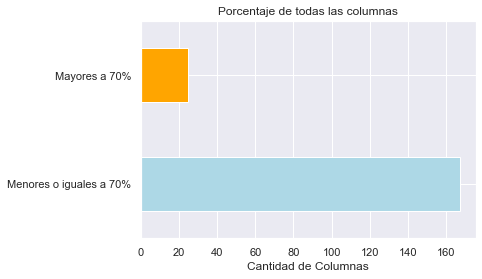

In [98]:
total_nulos['Porcentaje de nulos'].value_counts().plot.barh(color=['lightblue','orange'])
plt.title("Porcentaje de todas las columnas")
plt.xlabel('Cantidad de Columnas')

Agrego la parte de Braian donde borra las columnas. Iba a hacerlo de vuelta, pero si uso lo mismo es mas facil unirlo despues.

In [99]:
#Funcion que elimina columnas segun el porcentaje de nulos que tengan

def rmissingvaluecol(dataframe, porcentaje):
    l = []
    l = list(dataframe.drop(dataframe.loc[:,list((100*(dataframe.isnull().sum()/len(dataframe.index)) >= porcentaje))].columns, 1).columns.values)
    print("# Columns having more than %s percent missing values: "%porcentaje, (dataframe.shape[1] - len(l)))
    print("Columns:\n", list(set(list((dataframe.columns.values))) - set(l)))
    return l

In [100]:
filtrar_columnas = rmissingvaluecol(df,70)

df_filtrado = df[filtrar_columnas]

df_filtrado.shape

C:\Users\Fran\AppData\Local\Temp\ipykernel_13280\2839920292.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  l = list(dataframe.drop(dataframe.loc[:,list((100*(dataframe.isnull().sum()/len(dataframe.index)) >= porcentaje))].columns, 1).columns.values)


# Columns having more than 70 percent missing values:  25
Columns:
 ['D_49', 'D_87', 'D_108', 'D_53', 'D_142', 'B_39', 'R_9', 'D_66', 'R_26', 'D_135', 'D_136', 'D_137', 'D_138', 'D_110', 'B_29', 'D_134', 'B_42', 'D_82', 'D_106', 'D_76', 'D_111', 'D_132', 'D_73', 'D_88', 'D_42']


(276572, 167)

*Ahora que eliminamos los nulos queda trabajar con los outliers.
Evaluamos la posibilidad de que todos los valores restantes del dataframe esten entre 0 y 1 pero cuando haces un df.sample ya ves que algunos casos no
por lo que descartamos esa idea.*

Proseguimos viendo un caso de ejemplo para ver Outliers.

El valor maximo de la columna es:  4.81966993844126
El valor minimo de la columna es:  1.2950453317506216e-08
La cantidad de valores mayores a 3 son:  16


c:\Users\Fran\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


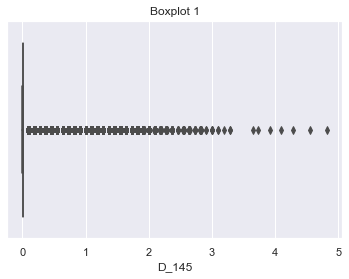

In [106]:
#Usando como ejemplo la columna D_145
#Busco los valores maximos y minimos de otro ejemplo
print("El valor maximo de la columna es: ",df_filtrado['D_145'].max())
print("El valor minimo de la columna es: ",df_filtrado['D_145'].min())

d_145=df_filtrado['D_145']
sns.boxplot(d_145).set(title='Boxplot 1')
print("La cantidad de valores mayores a 3 son: ",(d_145[d_145>3]).count())


#En este caso lo logico seria borrar esos 16 valores ya que son considerados outliers.

c:\Users\Fran\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Boxplot 2')]

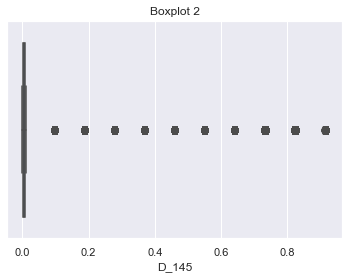

In [102]:
#Le hago 'zoom' a la parte entre 0 y 1 para que se vea mejor el boxplot
sns.boxplot(d_145[d_145<1]).set(title='Boxplot 2')



#Volvemos a ver que la gran concentracion de datos esta entre valores muy cercanos a 0 y luego pega saltos de aproximadamente 0.1

c:\Users\Fran\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Boxplot 3')]

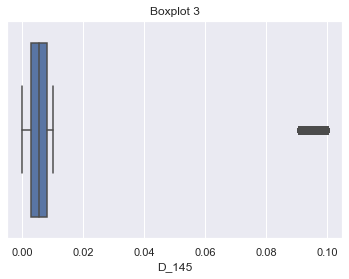

In [103]:
#Por ultimo grafico la misma columna para valores muy cercanos a 0
sns.boxplot(d_145[d_145<.1]).set(title='Boxplot 3')

Usando como ejemplo la columna D_145, vemos que segun el boxplot 3, se podrian 'considerar outliers' todos los valores que sean mayores a 0.02 pero como
esta cantidad en proporcion a los datos es grande, decidimos no eliminar dichos valores. Aunque si podria ser de eliminar los 16 valores mayores a 3 del
boxplot 1.

In [104]:
#Debido a que solo usaremos columnas numericas, creo un df numerico. Pero elimino la columna Unnamed: 0 y target (ya que debe ser 0 o 1) 
#y con el z-score se va a ver modificado.

df_num = df_filtrado.select_dtypes(include=['int', 'float'])
df_num = df_num.drop(['Unnamed: 0','target'],axis=1)
df_num.shape

(276572, 161)

### Empiezo a utilizar z-score

<AxesSubplot:xlabel='Z_Score', ylabel='Density'>

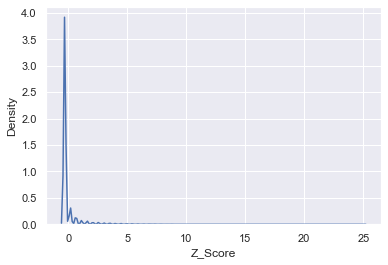

In [110]:
#Volvemos al ejemplo de la D_145 y creamos otro df para visualizarlo mejor
z_sc = pd.DataFrame(d_145,columns=["D_145"])
z_sc['Z_Score'] = stats.zscore(d_145,nan_policy='omit') #Si no pongo el omit, lo propaga y no funciona

z_sc

sns.kdeplot(z_sc['Z_Score'])
#sns.histplot(z_sc['Z_Score'])